In [1]:
import io
import os
import json
import time
import string
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from collections import Counter
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')
directory = "../Data/Blogs/"
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
blue, red, elm ='#336699', '#9A3334', '#217C7E'
%matplotlib inline
mydpi=600

__author__ = 'HK Dambanemuya'
__version__ = 'Python2'

In [2]:
data = []
for file in tqdm_notebook(os.listdir(directory)):
    if file != '.DS_Store':
        for line in open(directory+file, 'r'):
            data.append(json.loads(line))
len(data)

1270925

In [3]:
def get_sentiment(text): 
    score = analyser.polarity_scores(text.encode('utf-8'))
    return score.get('compound')

In [4]:
dates = [datetime.strptime(item.get('published')[0:23],"%Y-%m-%dT%H:%M:%S.%f") for item in tqdm_notebook(data)]

In [5]:
titles = [item.get('title') for item in tqdm_notebook(data)]

In [6]:
participants = [item.get('thread').get('participants_count') for item in tqdm_notebook(data)]

In [7]:
replies = [item.get('thread').get('replies_count') for item in tqdm_notebook(data)]

In [8]:
text = [item.get('text') for item in tqdm_notebook(data)]

In [9]:
length = [len(doc.split()) for doc in tqdm_notebook(text)]

In [10]:
sites = [site.get('thread').get('site').split(".")[0] for site in tqdm_notebook(data)]

In [11]:
countries = [item.get('thread').get('country') for item in tqdm_notebook(data)]

In [12]:
sentiment = [get_sentiment(item) for item in tqdm_notebook(text)]

In [13]:
df = pd.DataFrame()
df['date'] = dates
df['title'] = titles
df['text'] = text
df['participants'] = participants
df['replies'] = replies
df['length'] = length
df['source'] = sites
df['country'] = countries
df['sentiment'] = sentiment
df.to_csv("../Data/Fusion/blogs.csv", encoding='UTF-8', index=False)
df[['date', 'sentiment']].to_csv("../Data/Fusion/blogs_sentiment.csv", encoding='UTF-8', index=False)
df[df['length']>70][['date', 'sentiment']].to_csv("../Data/Fusion/blogs_sentiment_70.csv", encoding='UTF-8', index=False)
df[df['length']>100][['date', 'sentiment']].to_csv("../Data/Fusion/blogs_sentiment_100.csv", encoding='UTF-8', index=False)
df[df['length']>130][['date', 'sentiment']].to_csv("../Data/Fusion/blogs_sentiment_130.csv", encoding='UTF-8', index=False)

In [14]:
df.head(1)

,date,title,text,participants,replies,length,source,country,sentiment
0,2020-02-28 17:38:00,"Wall Street's Brutal Week Slashed Nearly 3,600 Points From Dow","By Jim Zarroli • 8 hours ago Traders work during the opening bell at the New York Stock Exchange on Friday. Losses on Wall Street deepened following a bruising open, as global markets were poised to conclude their worst week since 2008 with another rout. Johannes Eisele / AFP via Getty Images Originally published on February 28, 2020 5:47 pm\nUpdated at 5:40 p.m. ET\nStocks took another steep dive Friday, deepening a multi-day rout fueled by fears about the coronavirus' impact on the global economy.\nThe Dow Jones Industrial Average fell 357 points on Friday, capping a week in which the blue chip index fell 3,583 points or 12.4%. The Dow is down 16.3% from its recent peak on Feb. 12.\nThe S&P 500 stock index lost 11.5% for the week and is now down 14.6% from the all-time high it reached only last week.\nThe Nasdaq inched into positive territory in the closing minutes of trading Friday, but is still down 10.5% for the week and 14.6% below its record high last Wednesday.\nThe drop in stocks this week has come with stunning speed, as investors grapple with evidence that the deadly coronavirus epidemic is spreading beyond China to other countries, including Italy, South Korea and Iran.\n""It's unprecedented, really. And certainly in my career, and even if you go back 70 years, we've never had a correction--that is a 10% pullback from a high--develop so quickly,"" said Paul Christopher, head of global market strategy at Wells Fargo Investment Institute.\nFederal Reserve Chairman Jerome Powell sought to calm jittery investors, with reassurance that the central bank is prepared to cut rates if necessary. A pedestrian walks past a board displaying the closing figure of the Nikkei Stock Average in Tokyo on Friday. All of the major indexes are now in what the markets call a correction, and stocks also were down in Asia and Europe. Tomohiro Ohsumi / Getty Images\n""The fundamentals of the U.S. economy remain strong,"" Powell said in a rare, written statement . ""However, the coronavirus poses evolving risks to economic activity. The Federal Reserve is closely monitoring developments and their implications for the economic outlook. We will use our tools and act as appropriate to support the economy.""\nThe Trump Administration argued that the plummet in stock prices was unlikely to affect the broader economy.\nLarry Kudlow, director of the National Economic Council, called the downturn a ""short-term market plunge"" and said, ""I don't think at this point it's going to have much of an impact.""\nKudlow said he had spoken to corporate CEOs and had not heard of serious supply-chain problems.\nBut investors appear anxious anyway, and the interest rate on U.S. government debt, which usually falls in turbulent times, lost more ground. The 10-year Treasury bill dipped to a record low of 1.15%.\n""Uncertainty regarding something as serious as this has a tendency to induce the kind of fear that in in the market's view is 'sell [first] and ask questions later,'"" said Quincy Krosby, chief market strategist at Prudential Financial.\nWith the S&P 500 index down 14.6%, the market is officially in what Wall Street calls a market correction when stocks are at least 10% below a recent high.\nAll three major stock indexes posted their largest ever point drops on Thursday.\nCompanies around the world are cutting production and canceling conferences to limit the outbreak's spread. JPMorgan Chase announced it is eliminating nonessential employee travel, while United Airlines said today it is reducing flights to Japan, Singapore and South Korea.\nAs businesses slow down, economists say the odds of a global recession have increased significantly.\n""With the coronavirus pandemic spreading throughout the world, falling corporate sales and its economic impact will depress economic growth,"" wrote Sung Won 

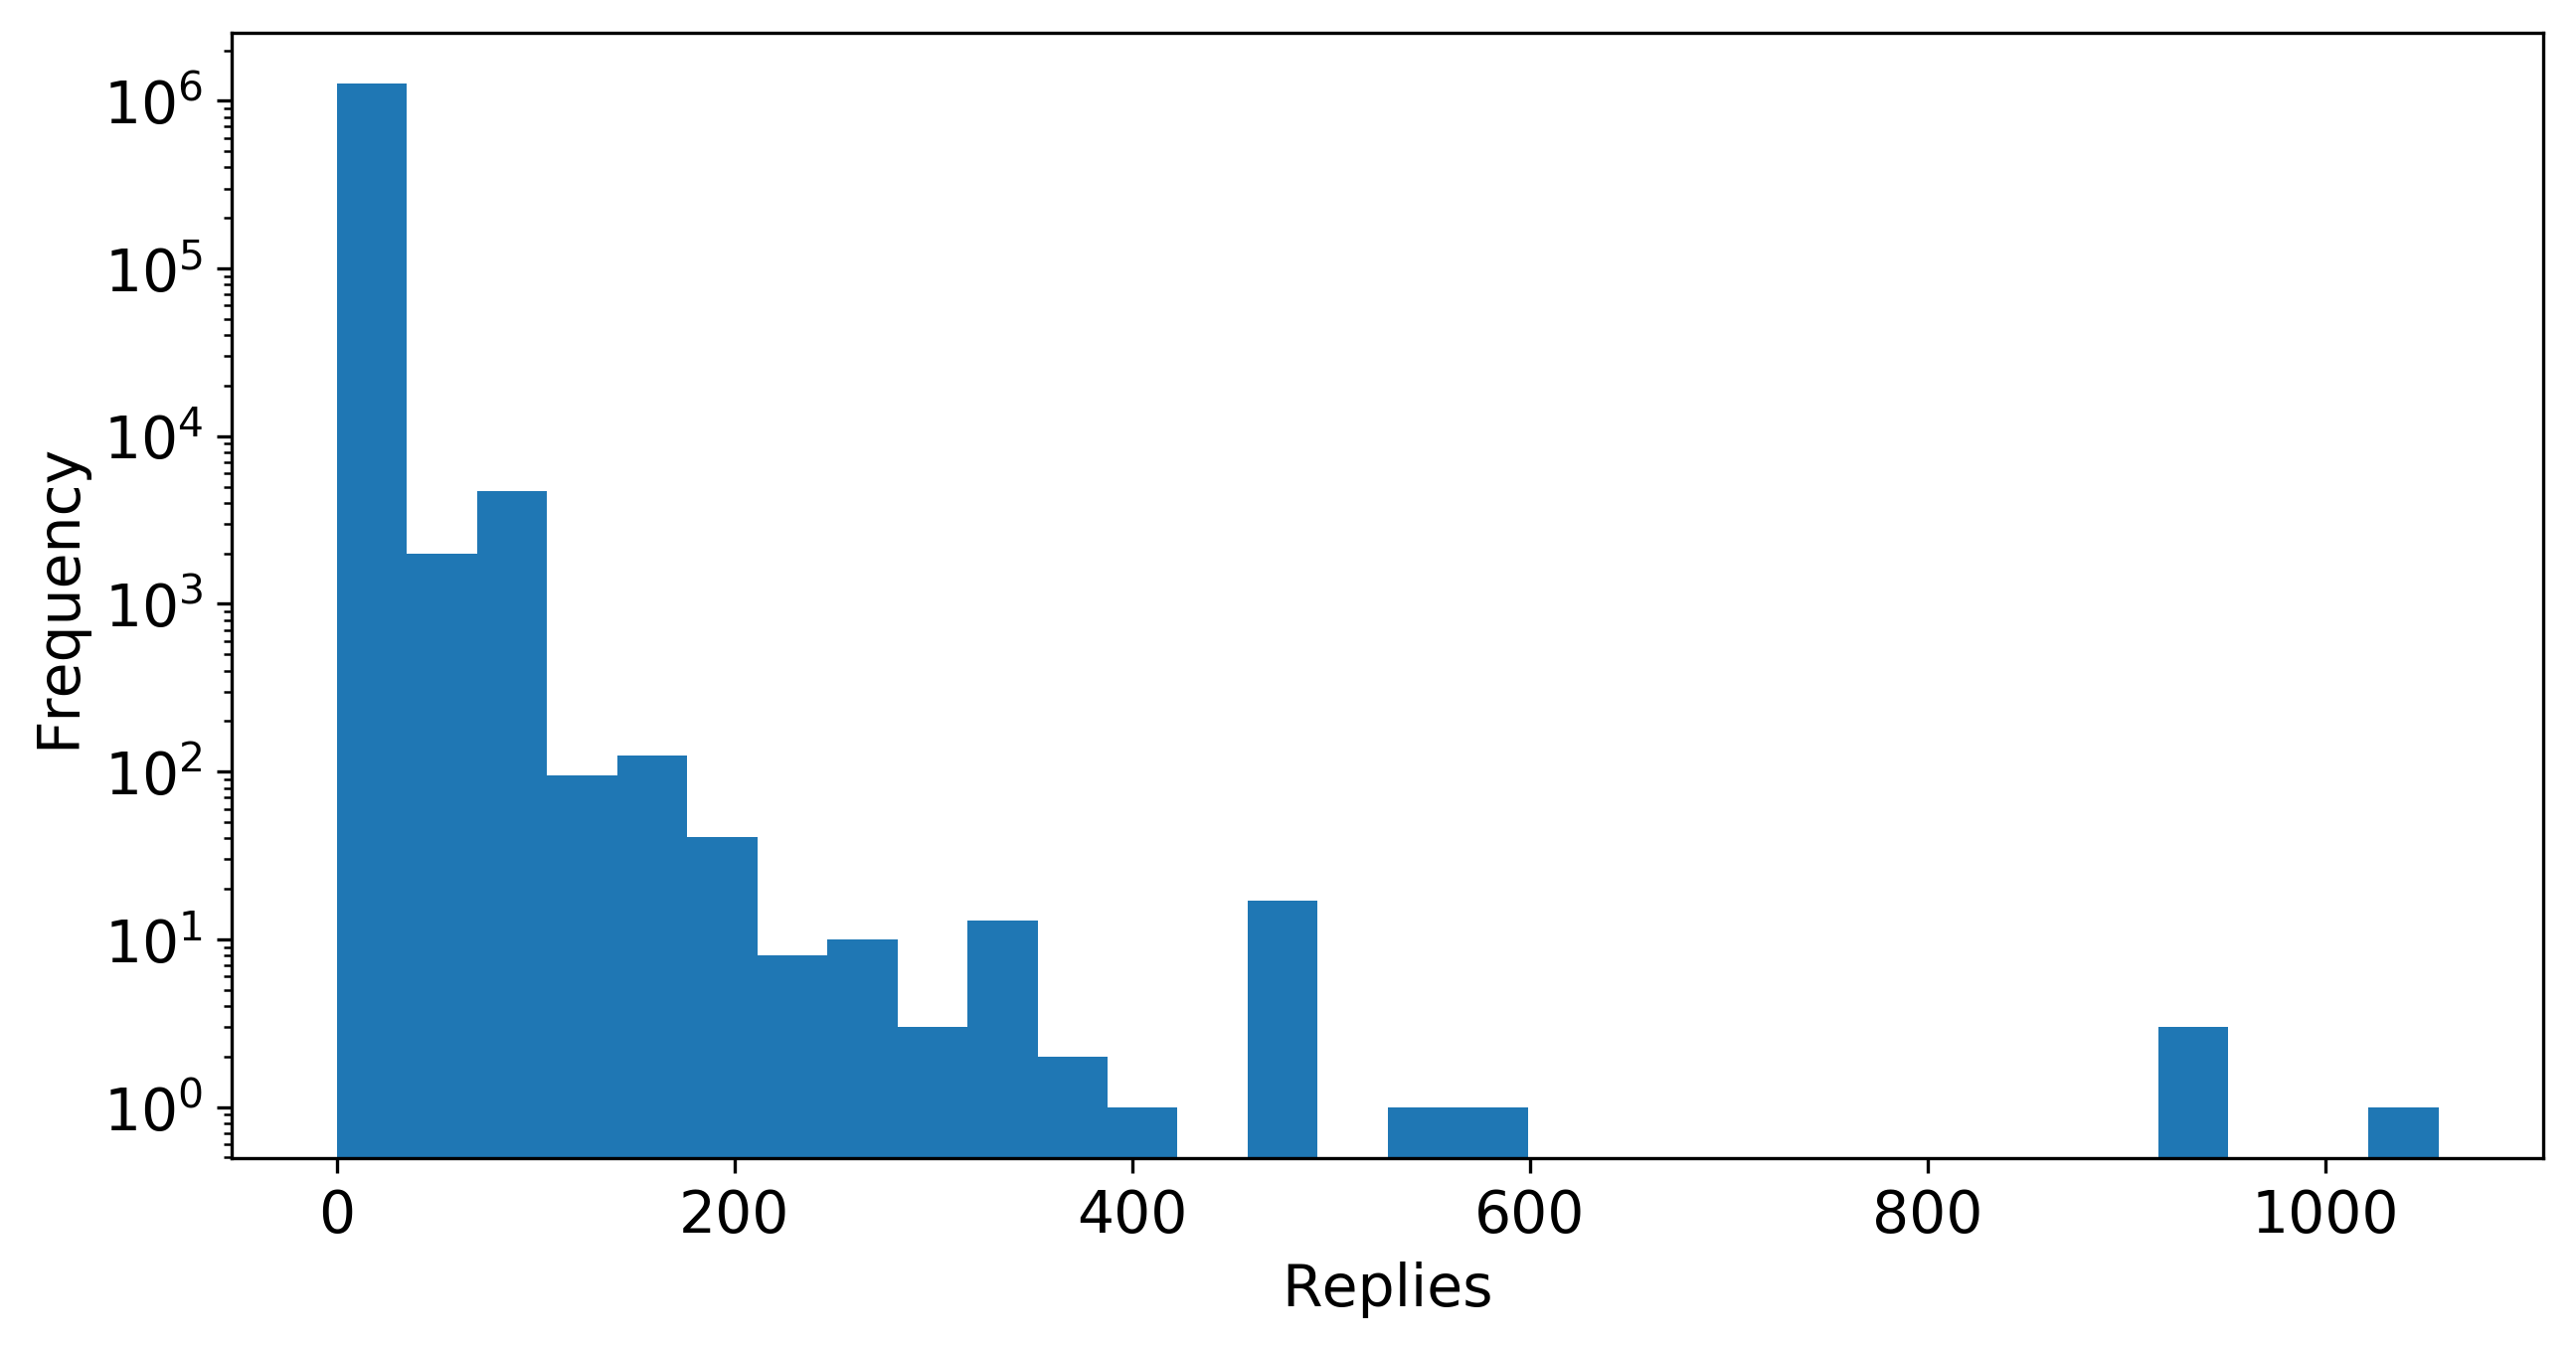

In [15]:
fig = plt.figure(figsize=(10,5), dpi=300)
ax = df['replies'].plot(kind='hist', bins=30, ax = plt.gca())
plt.yscale('log')
plt.xlabel("Replies", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

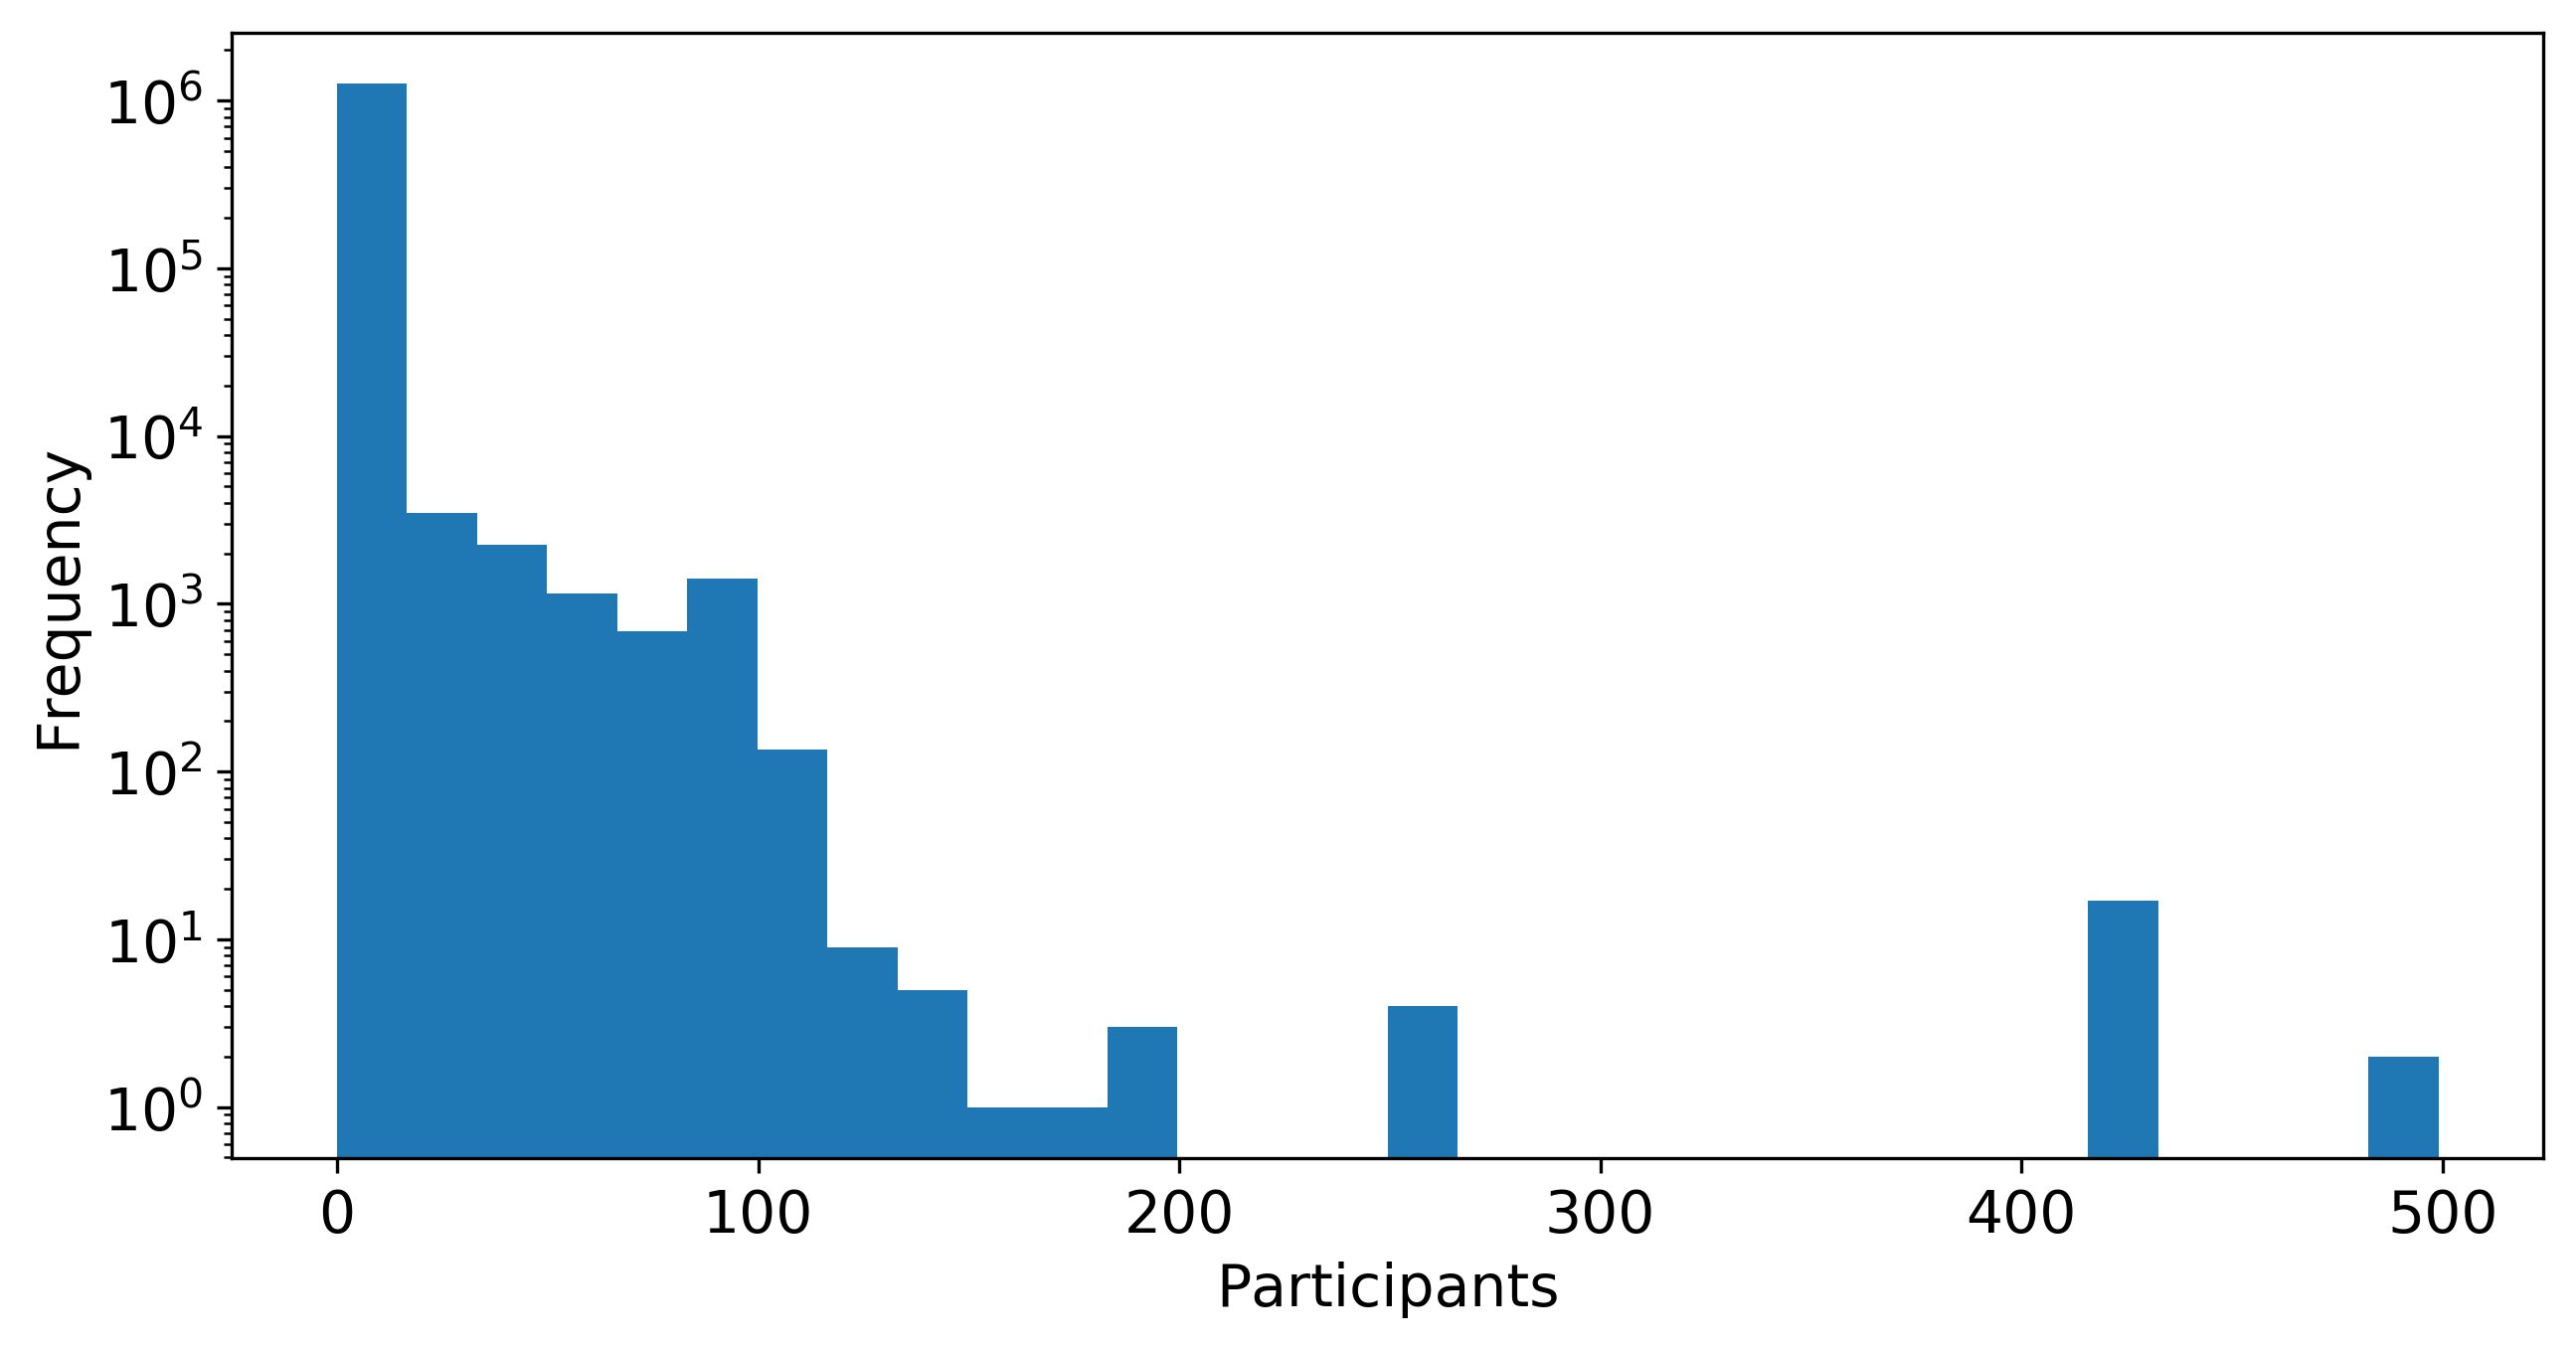

In [16]:
fig = plt.figure(figsize=(10,5), dpi=300)
ax = df['participants'].plot(kind='hist', bins=30, ax = plt.gca())
plt.yscale('log')
plt.xlabel("Participants", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

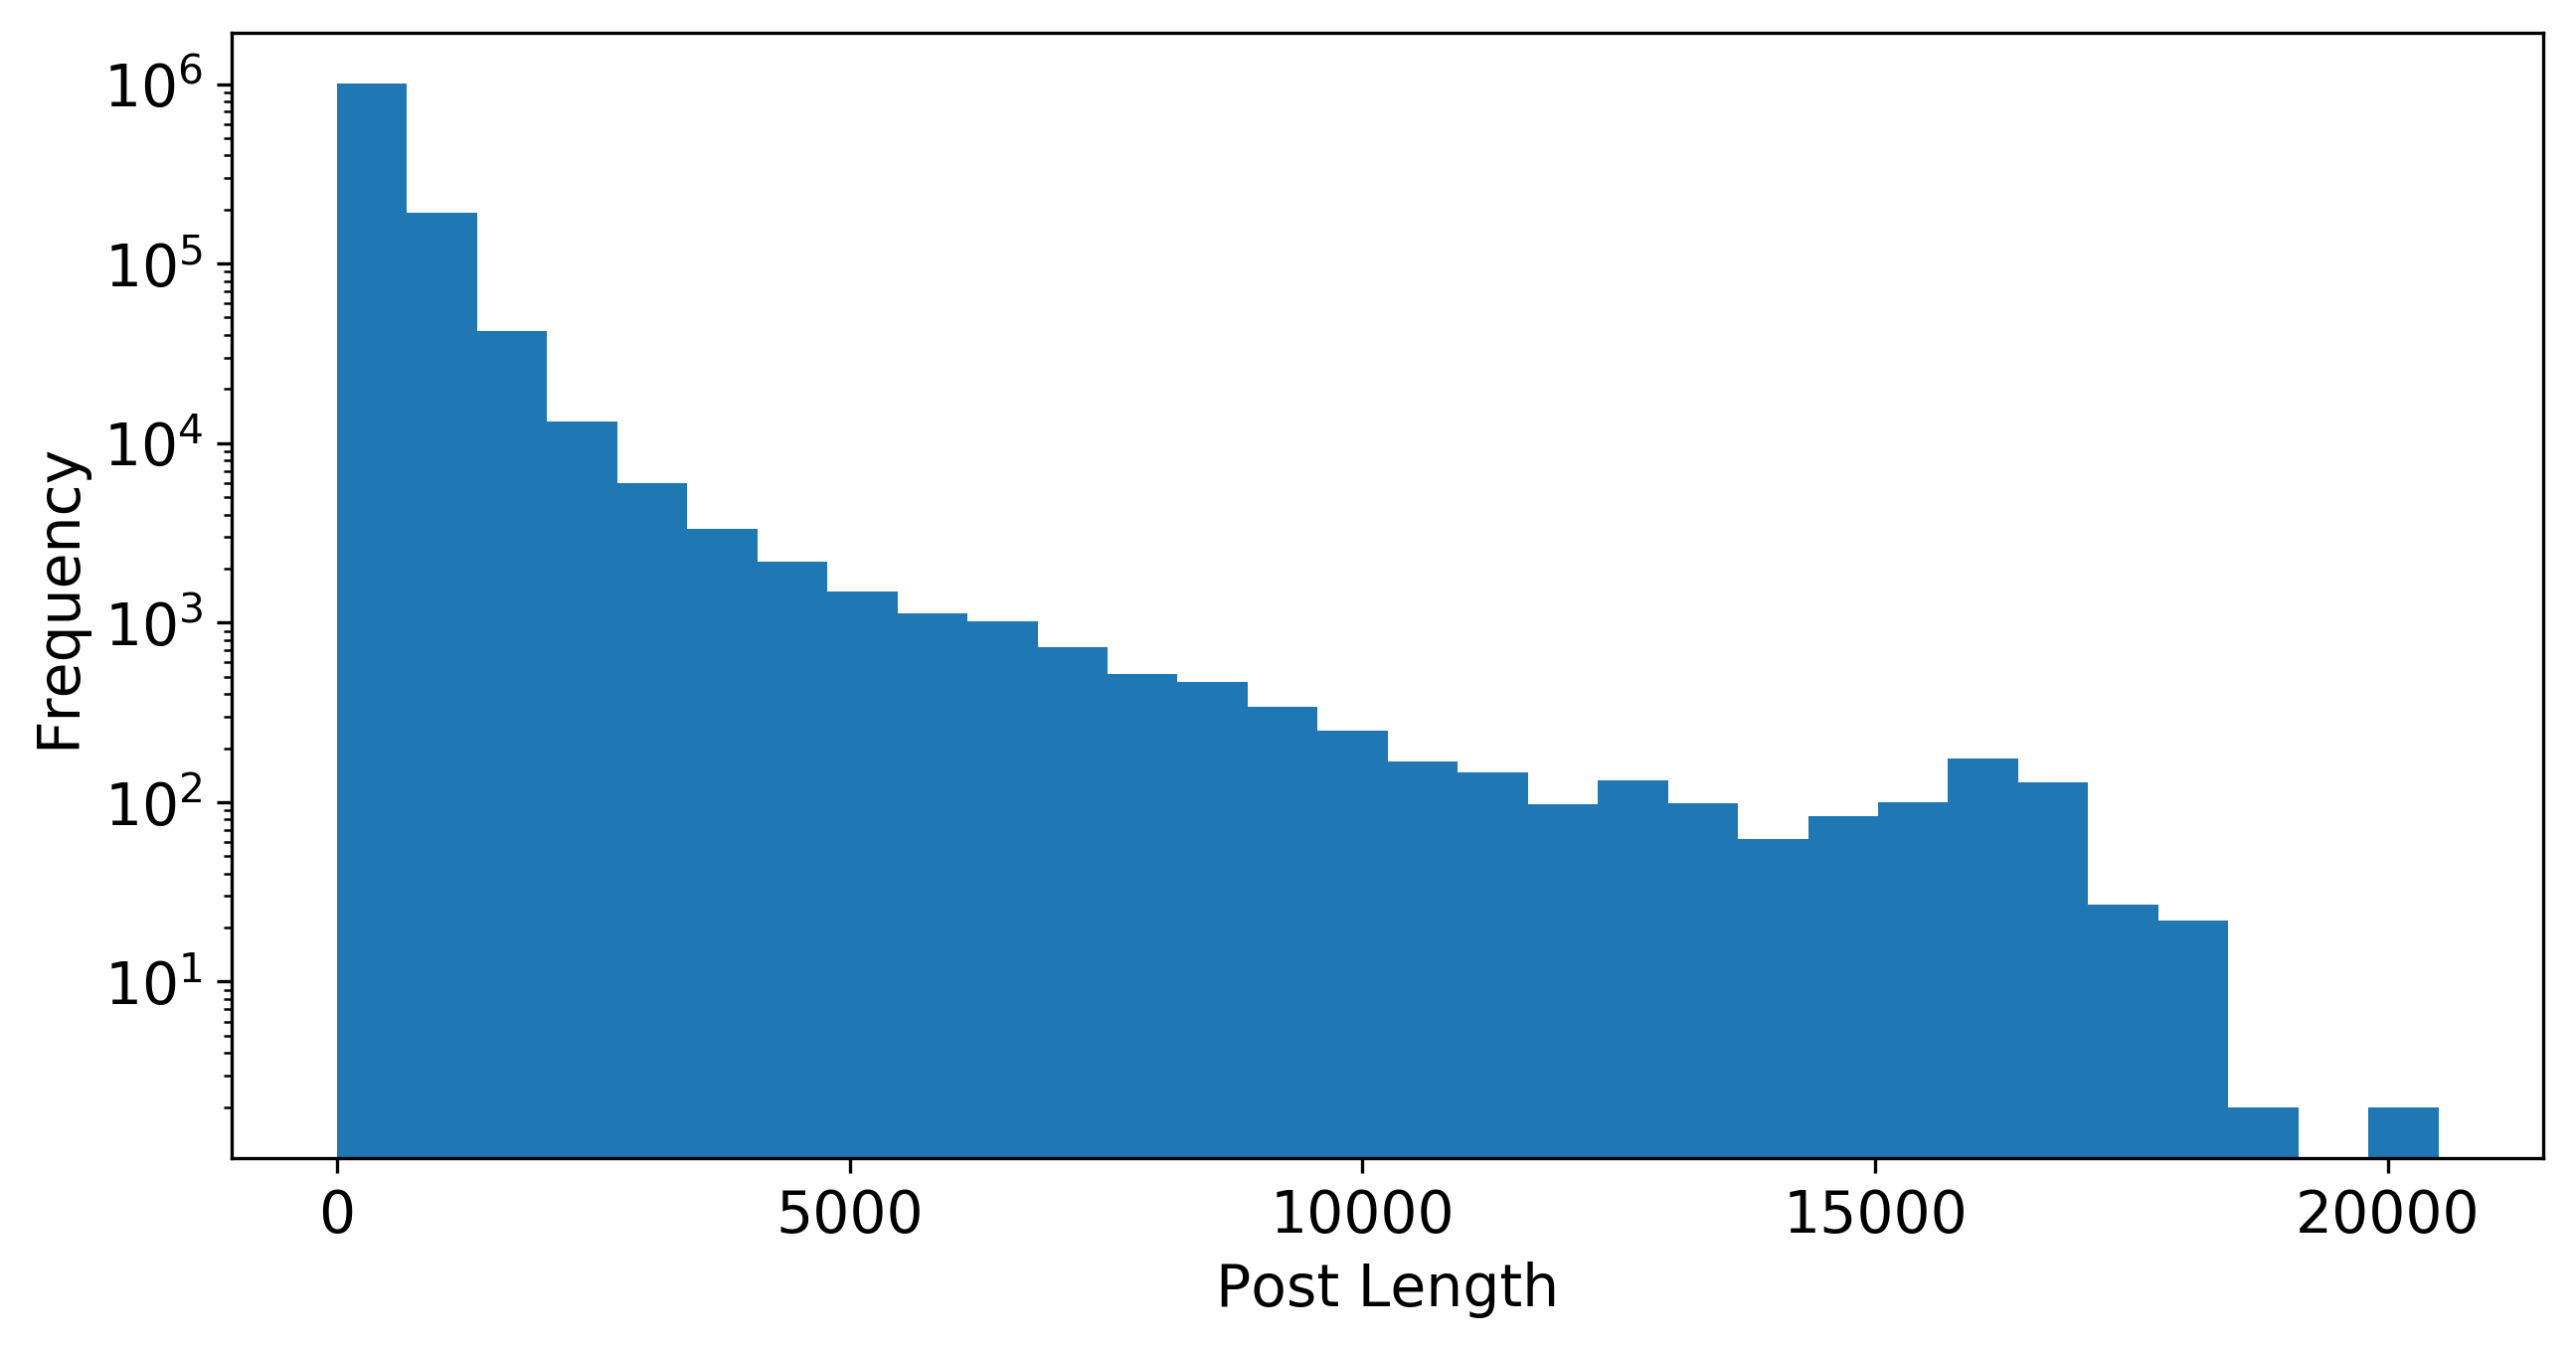

In [17]:
fig = plt.figure(figsize=(10,5), dpi=300)
ax = df['length'].plot(kind='hist', bins=30, ax = plt.gca())
plt.yscale('log')
plt.xlabel("Post Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [18]:
var_dates = [datetime.strftime(date, '%Y-%m-%d') for date in dates]
dic_dates = Counter(var_dates)
with open('../Data/Fusion/blog_dates.json', 'w') as f:
    json.dump(dict(dic_dates), f)

In [19]:
k, v = [], []
for key in sorted(dic_dates.keys()):
    k.append(key)
    v.append(dic_dates.get(key))

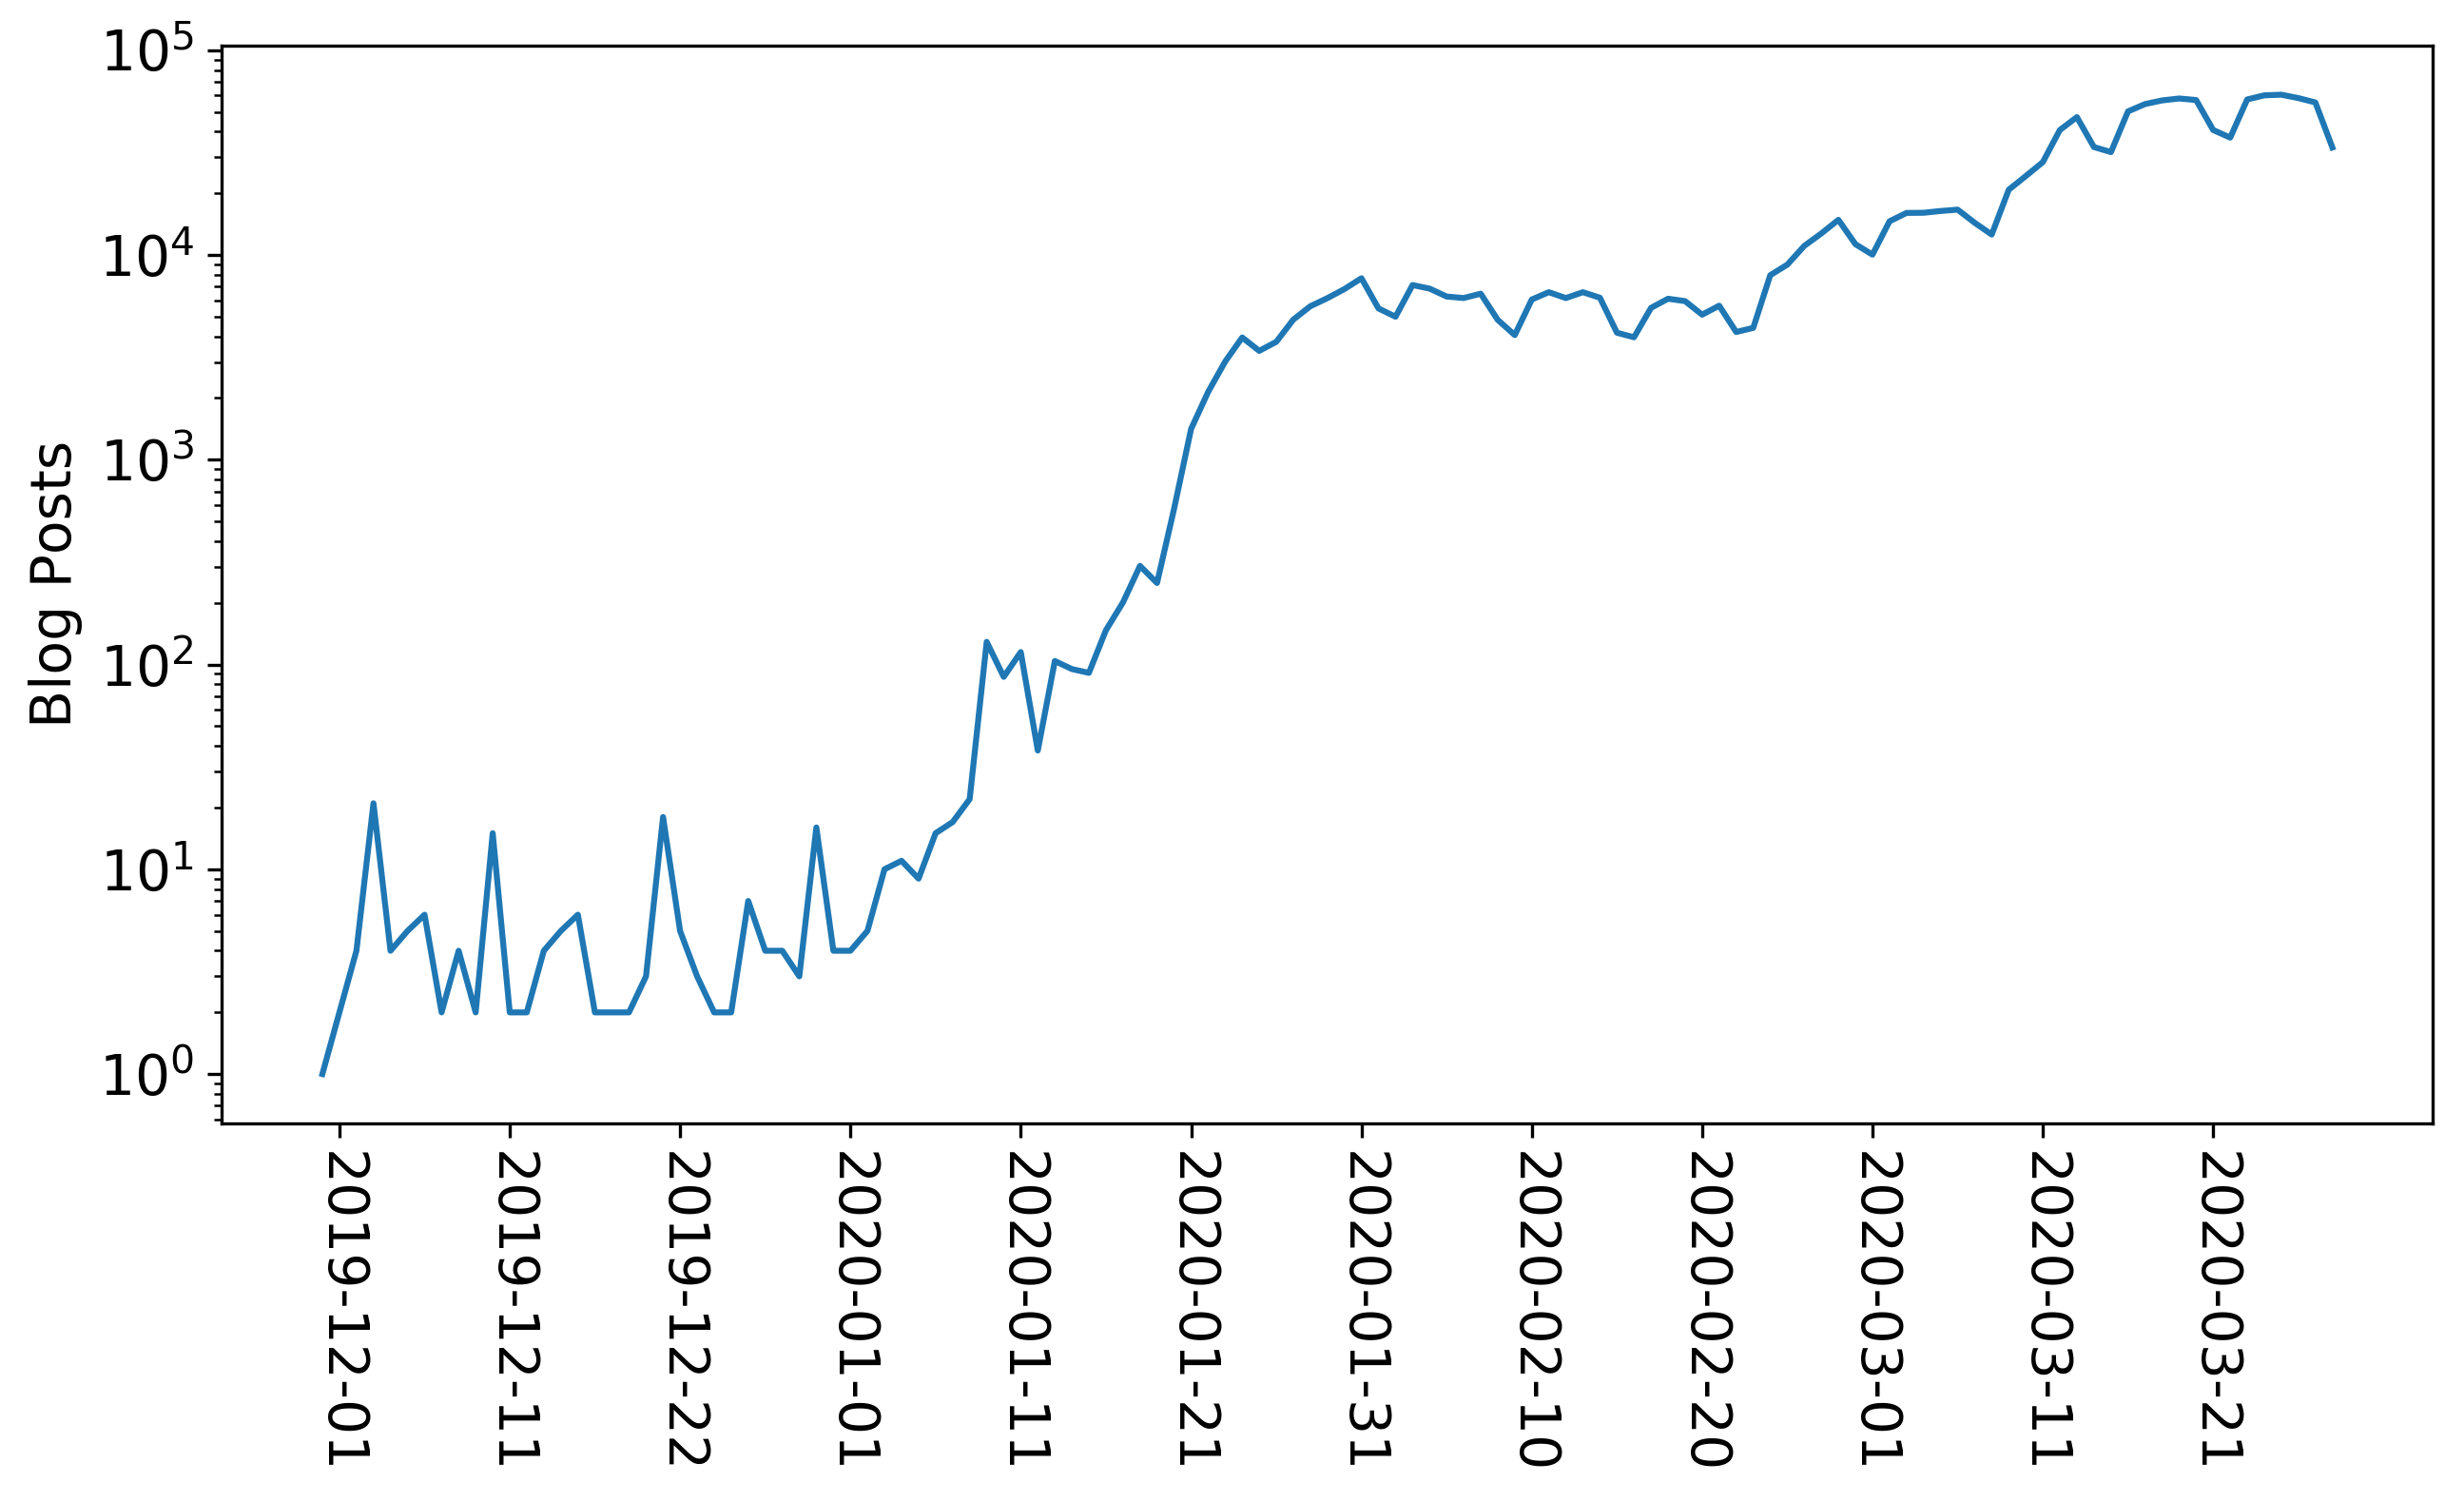

In [20]:
fig = plt.figure(figsize=(10,5), dpi=300)
plt.plot(k[:-1],v[:-1], label='Blogs')
plt.xticks(np.arange(1, len(k), 10), rotation=270)
plt.yscale('log')
plt.ylabel("Blog Posts", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend()
plt.show()

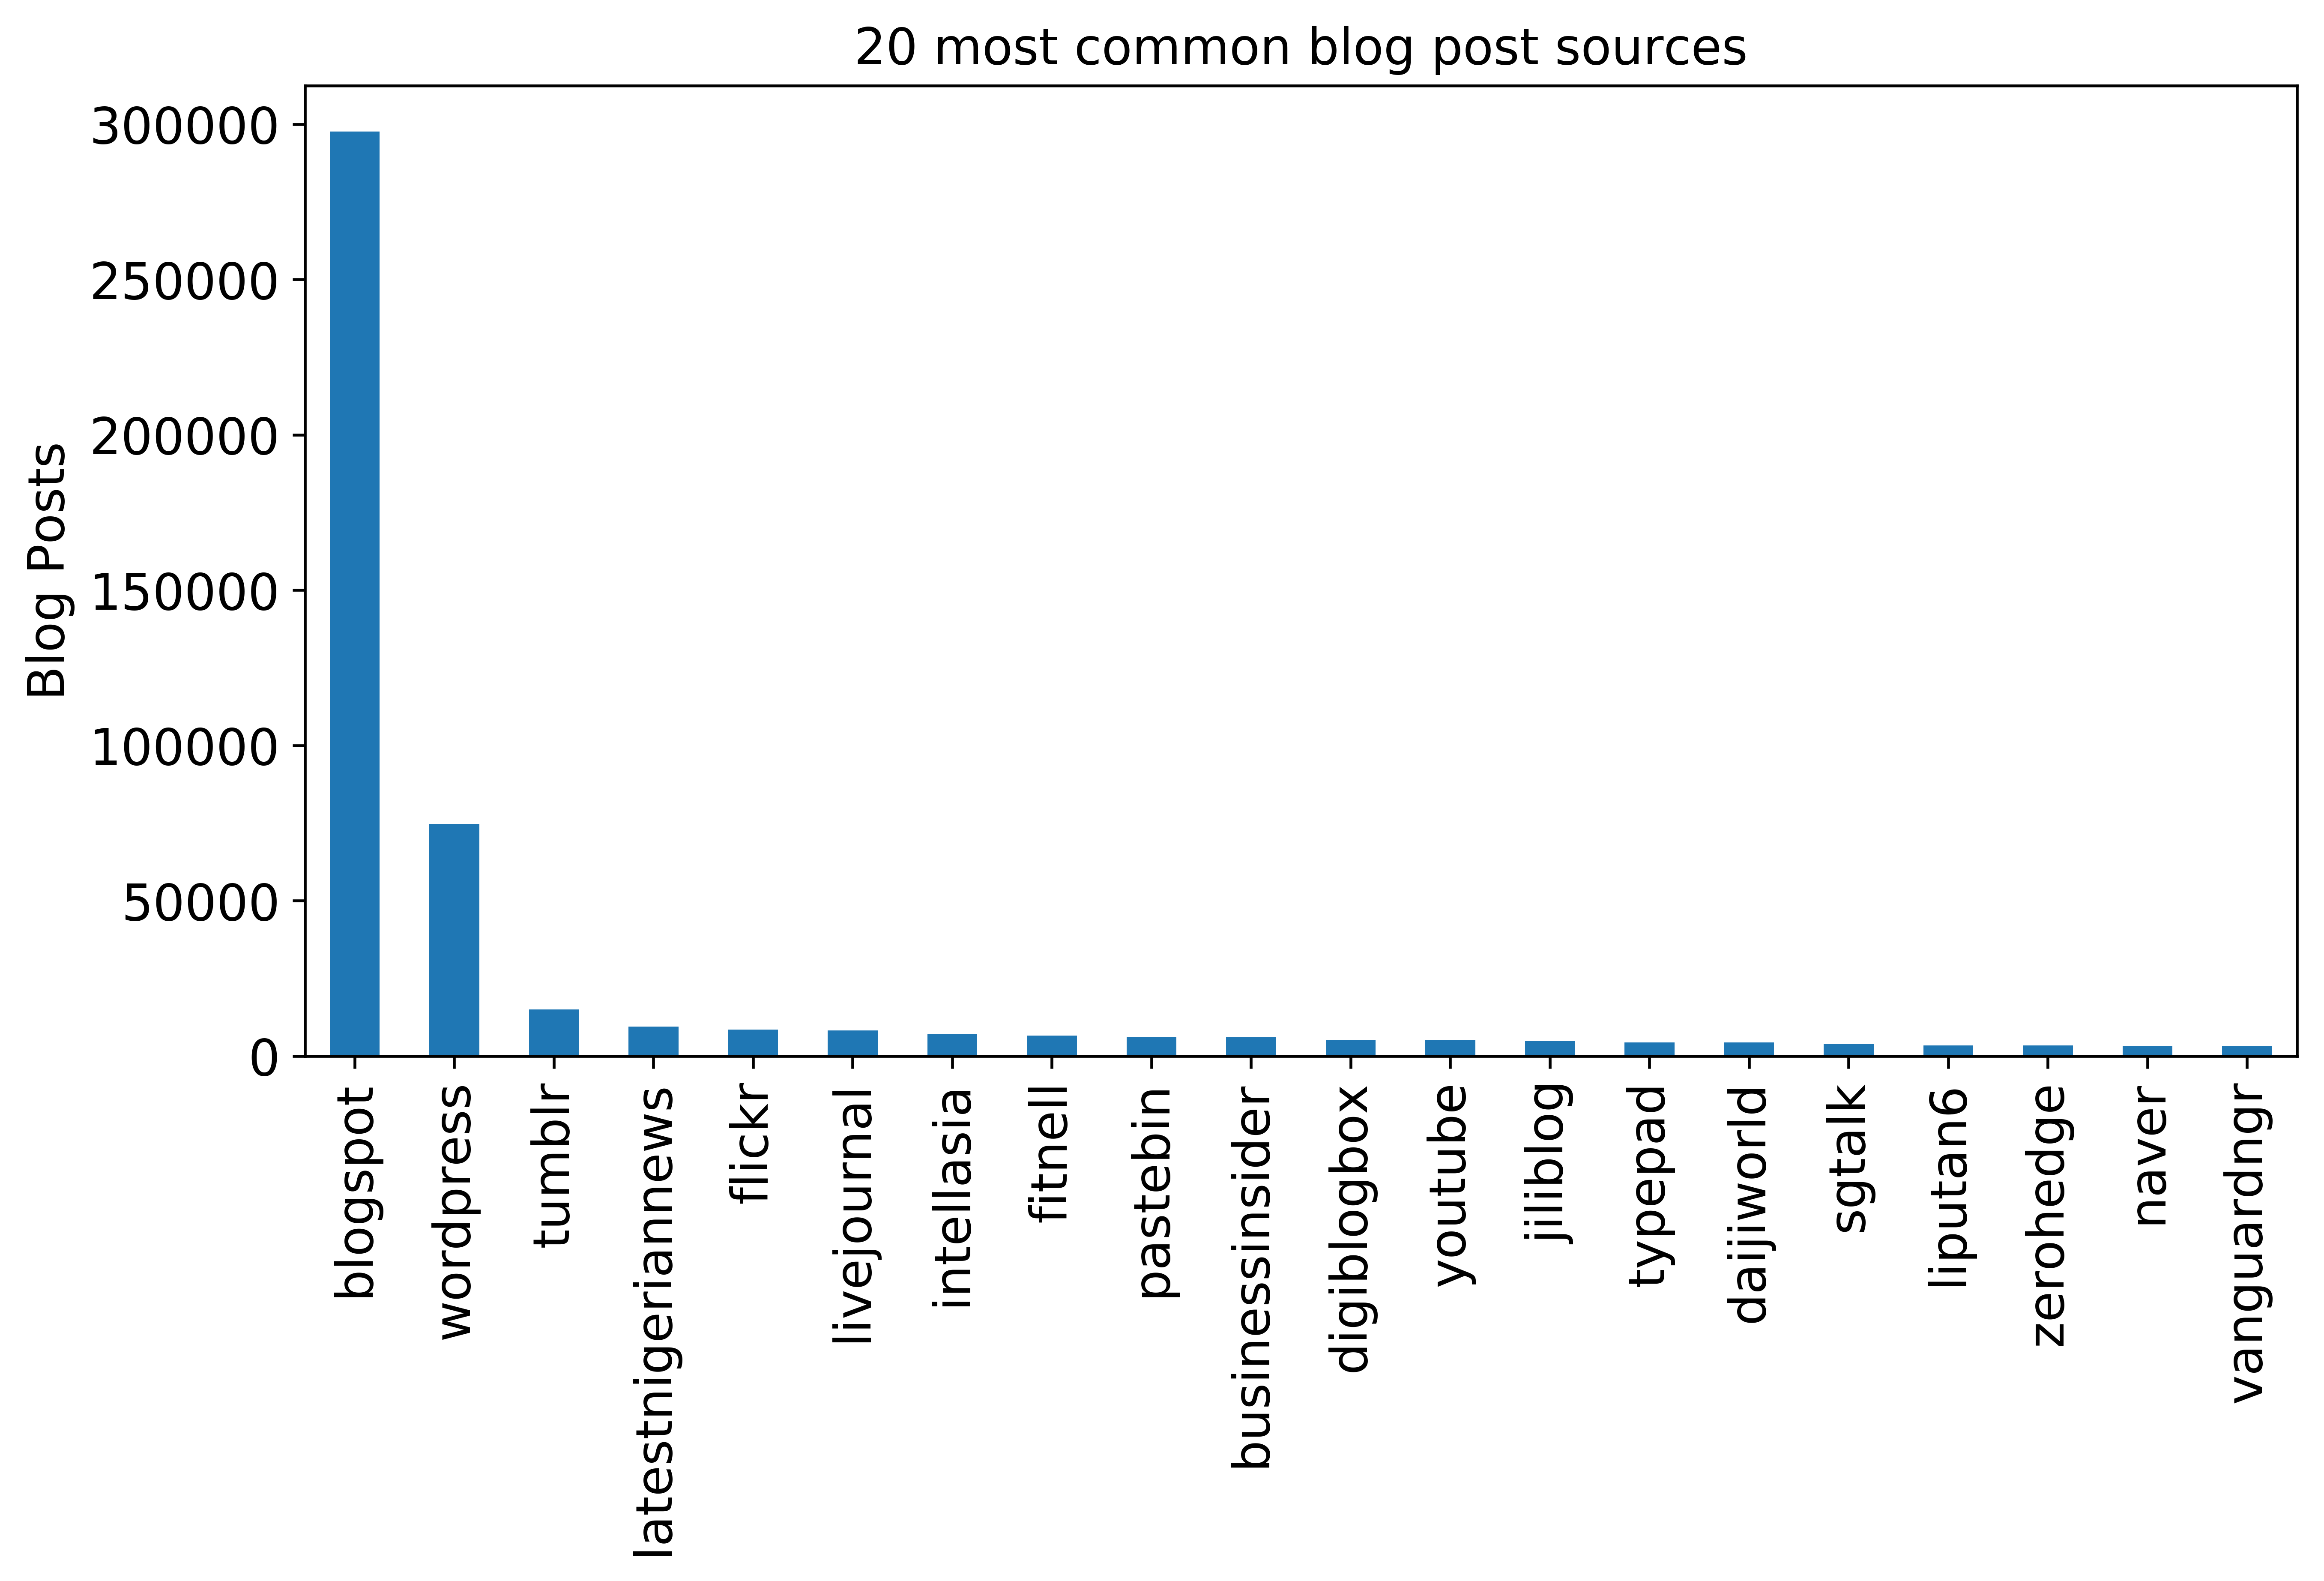

In [21]:
plt.figure(figsize=(10,5), dpi=mydpi)
df['source'].value_counts()[:20].plot(kind='bar')
plt.ylabel("Blog Posts", fontsize=14)
plt.title("20 most common blog post sources", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

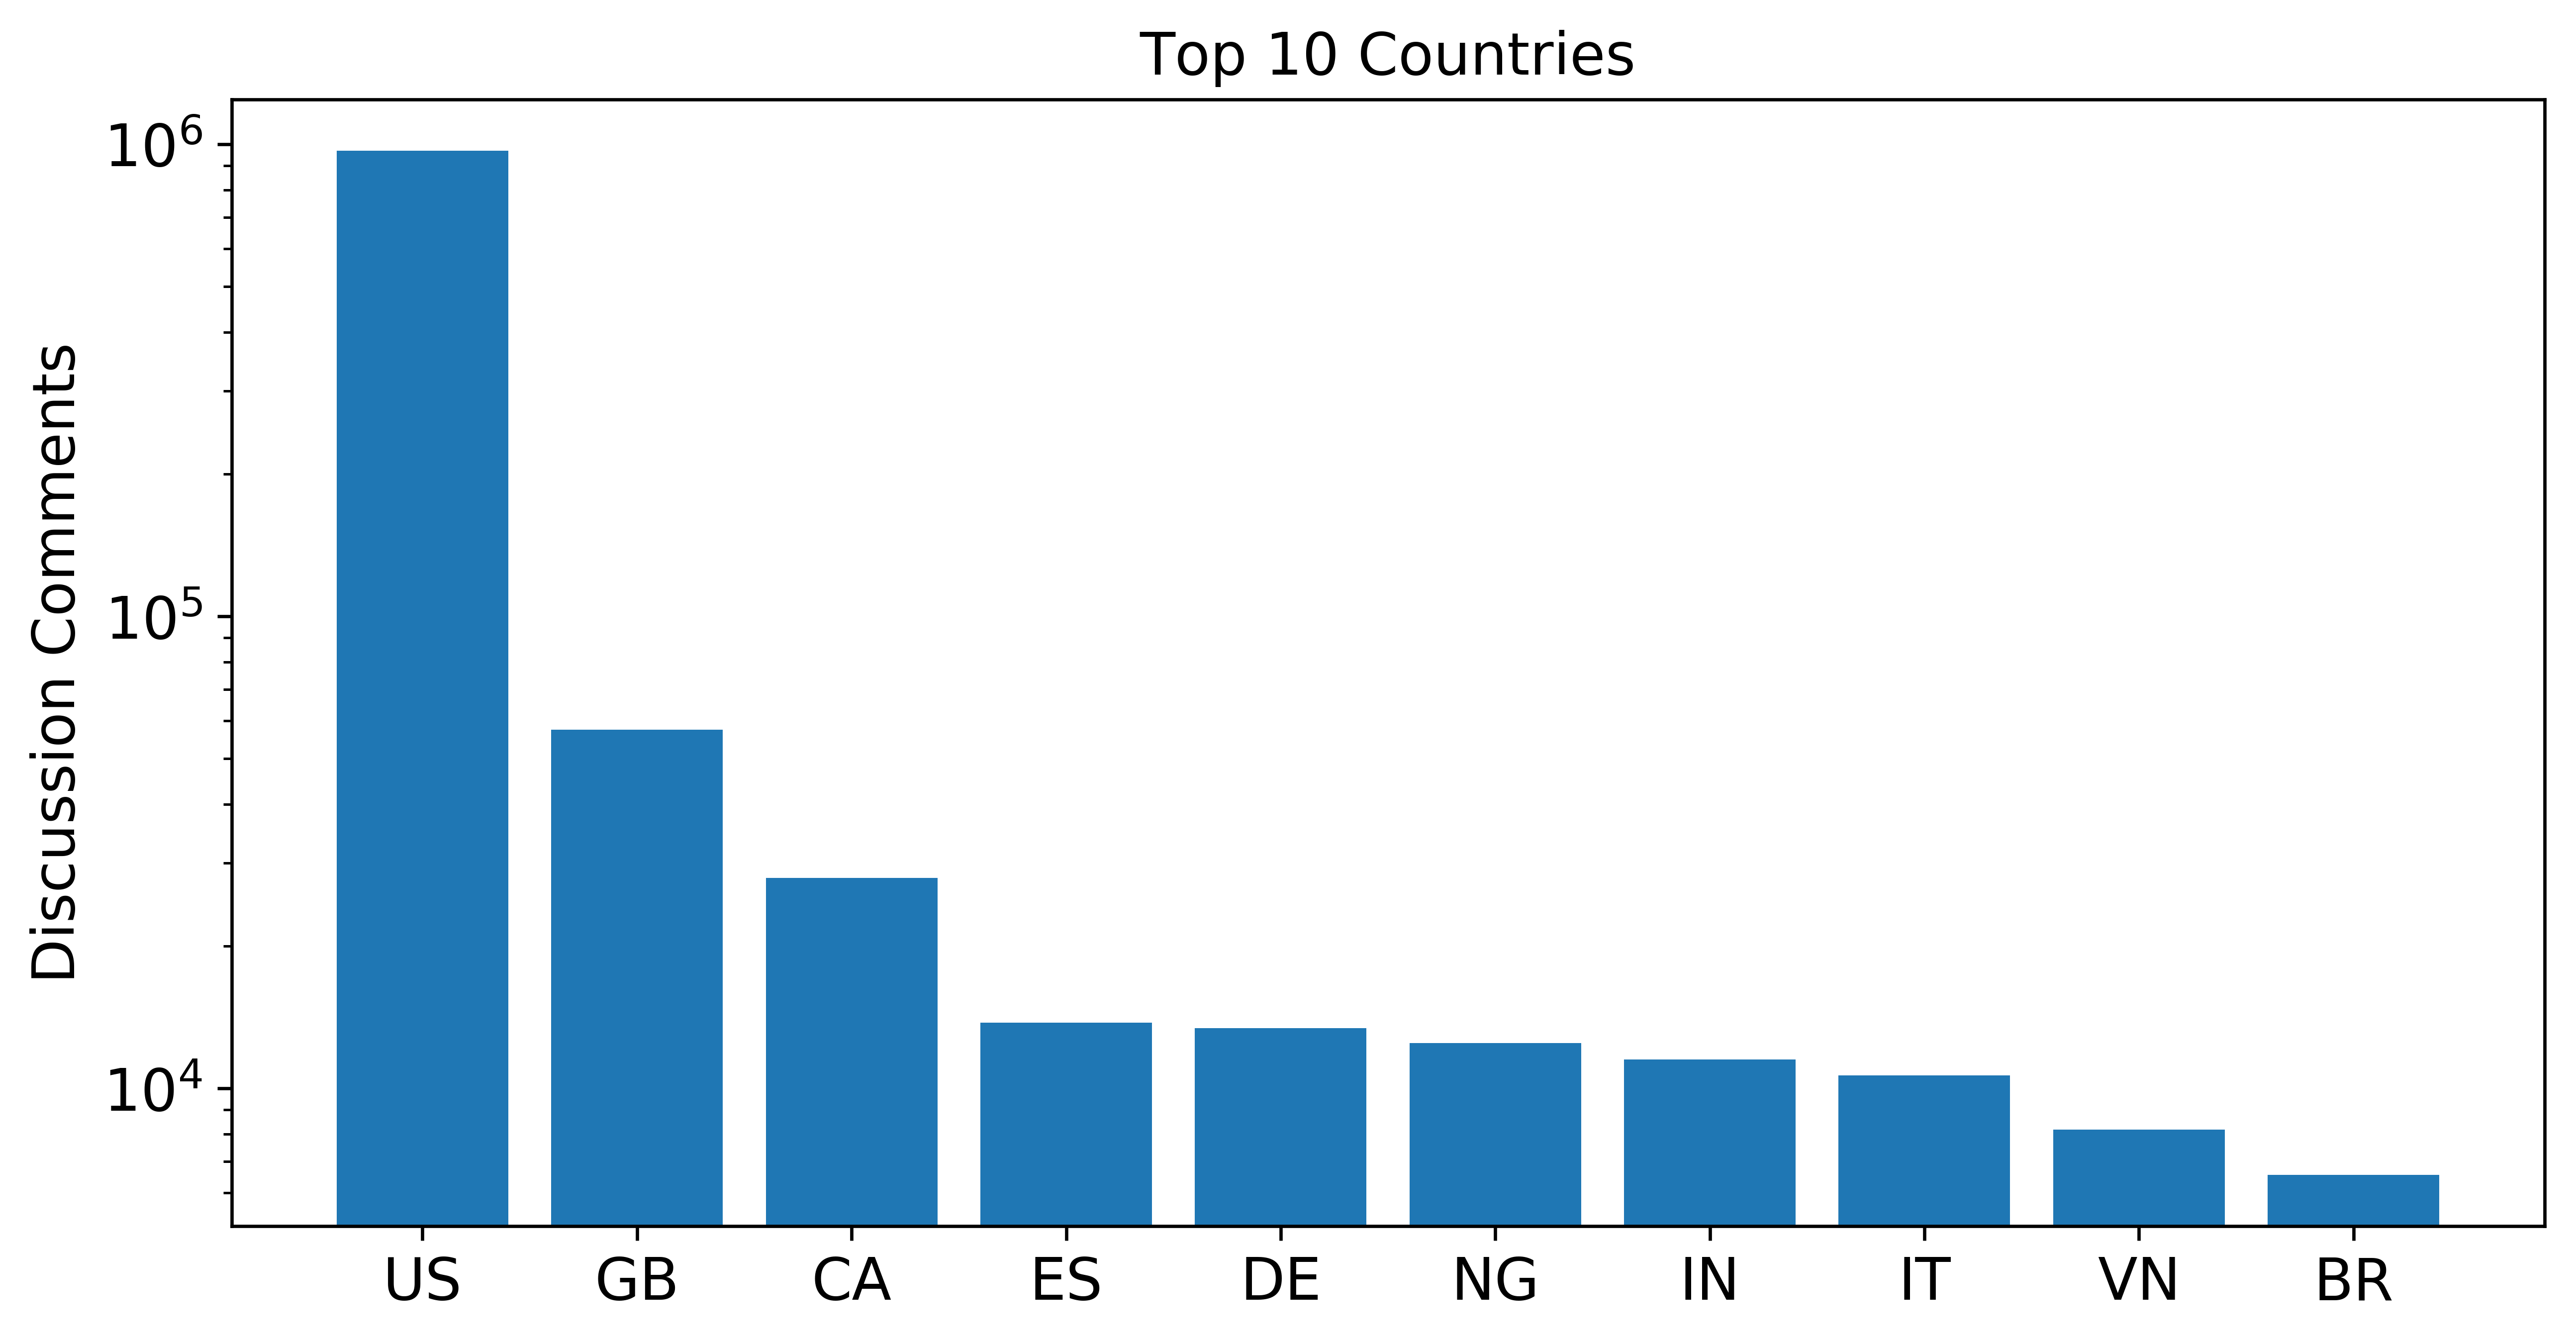

In [23]:
plt.figure(figsize=(10,5), dpi=mydpi)
plt.bar([i[0] for i in Counter(df['country']).most_common(11) if i[0] != ''], 
       [i[1] for i in Counter(df['country']).most_common(11) if i[0] != ''])
plt.ylabel("Discussion Comments", fontsize=14)
plt.title("Top 10 Countries", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.show()

In [24]:
Counter(df['country']).most_common(11)


[(u'US', 969697),
 (u'GB', 57434),
 (u'', 36830),
 (u'CA', 27871),
 (u'ES', 13781),
 (u'DE', 13405),
 (u'NG', 12455),
 (u'IN', 11518),
 (u'IT', 10661),
 (u'VN', 8184),
 (u'BR', 6560)]